# Project Name: World Cup 2023 Analysis

Md. Harun-Or-Rashid Khan

**Our Aim:** 
Tasked with performing a detailed exploratory data analysis on the World Cup 2023 dataset.

The goal is to uncover patterns, trends, and notable statistics that provide a delicate understanding of team 
and player performance. 

The analysis should encompass both batting and bowling aspects, considering key metrics such as runs, wickets,
strike rate, economy rate, and other relevant factors. 

# Description of each column in your dataset:
**team:** The cricket team to which the player belongs.

**player:** The name of the cricket player.

**bat_or_bowl:** Indicates whether the player batted or bowled in the innings. It could have values like 'bat' for batting and 'bowl' for bowling.

**bb_bf:** The total number of balls bowled or faced by the player.

**runs:** The total runs scored by the player in the innings.

**wkts:** The total wickets taken by the player in the innings.

**wicketball_prob:** Probability of taking a wicket per ball bowled.

**runs_per_ball:** Average runs scored by the player per ball faced or bowled.

**opposition:** The opposing team against which the player played the match.

**ground:** The cricket ground where the match was played.

**start_date:** The date when the match started.

**overs:** The total number of overs bowled by the player.

**mdns:** The number of maidens bowled by the player.

**econ:** The economy rate of the player (runs conceded per over bowled).

**inns:** The innings number of the player (e.g., 1st innings, 2nd innings).

**4s:** The number of fours hit by the player.

**6s:** The number of sixes hit by the player.

**sr:** The strike rate of the player (runs scored per 100 balls faced).

**not_out:** Indicates whether the player remained not out in the innings.

**mins:** The number of minutes the player spent on the field during the innings.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
 
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r"G:\certificate-25\Mentorness\Task3\CWC23_all_innings.csv"
df = pd.read_csv(path)
df.head()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(1408, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

<Axes: >

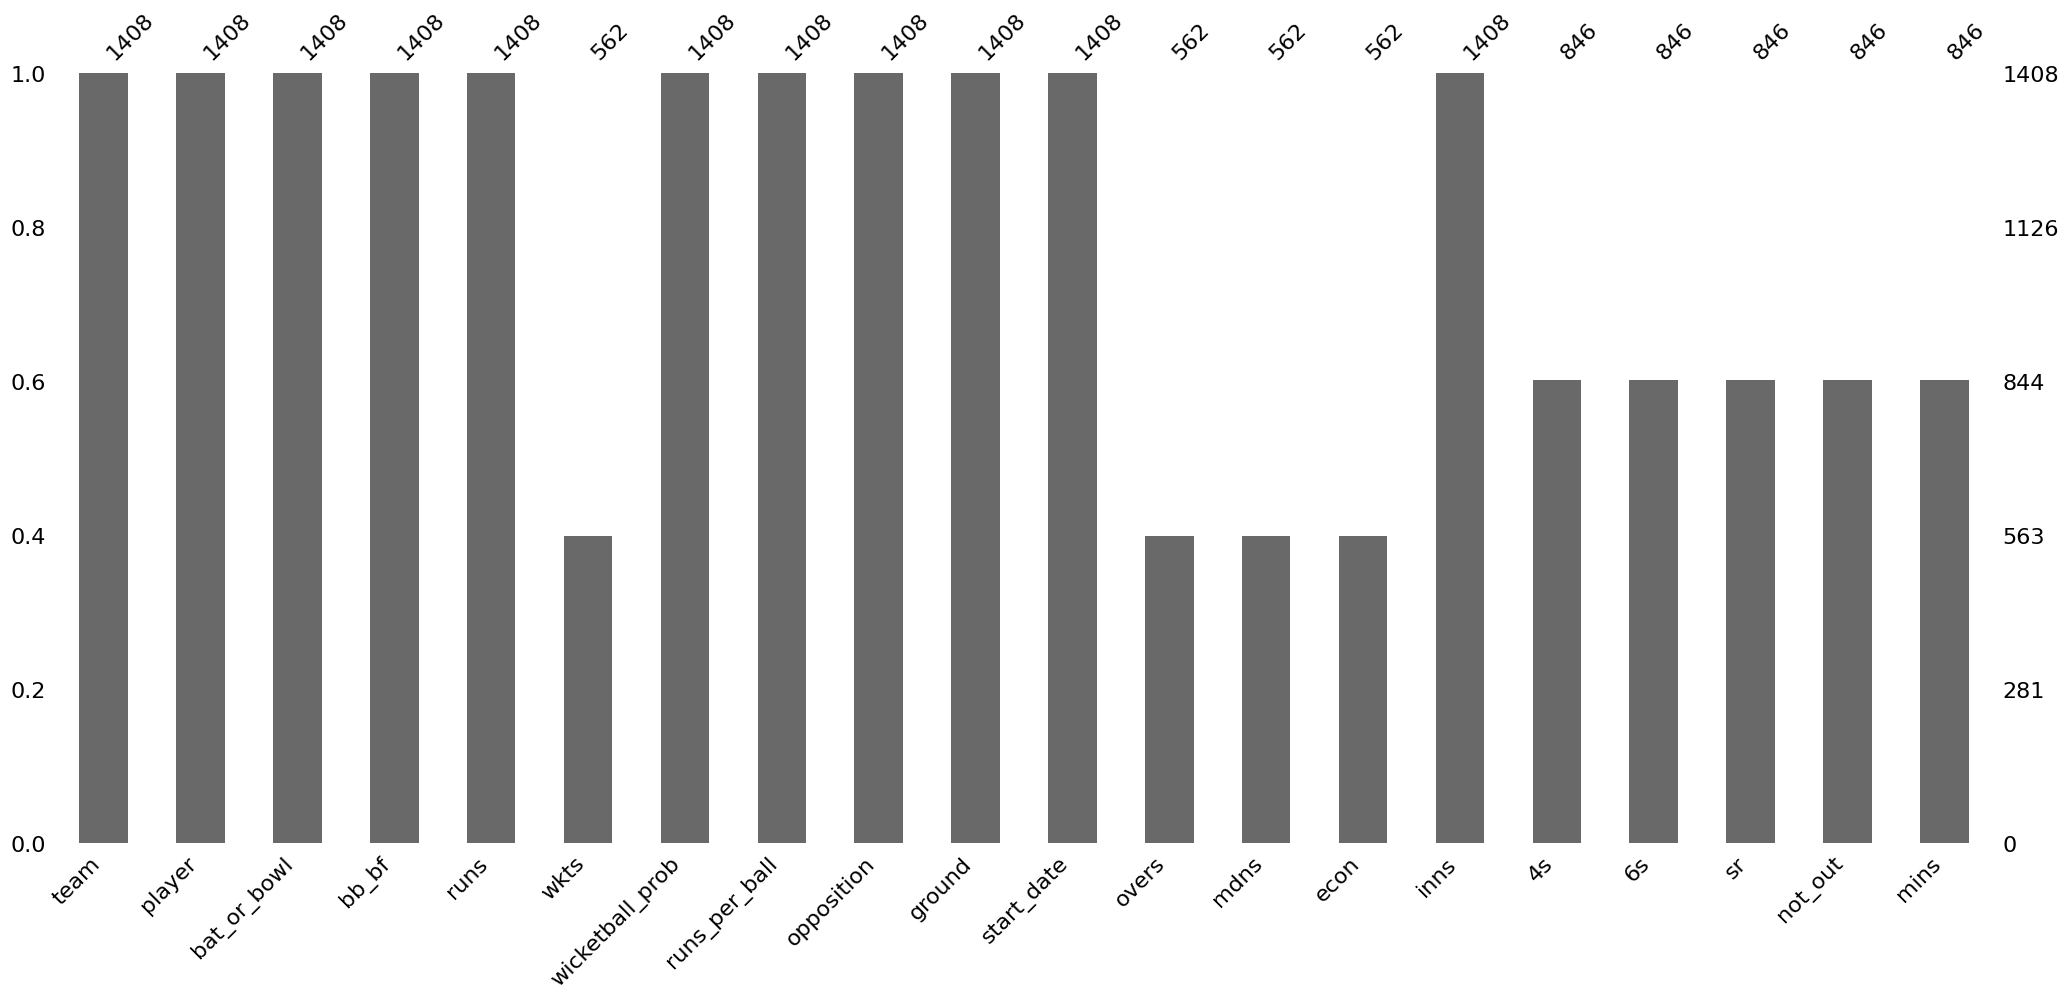

In [5]:
import missingno as msno

#visualize missing values with missingno library
msno.bar(df)

In [6]:
# Remove '() ' from the 'player' column
df['player'] = df['player'].str.replace(r'\s*\(.*\)', '', regex=True)


# Remove 'v ' from the 'opposition' column
df['opposition'] = df['opposition'].str.replace(r'^v\s+', '', regex=True)

df.head()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi,bowl,60,45,3.0,0.05,0.750000,South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey,bowl,60,45,3.0,0.05,0.750000,India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry,bowl,60,48,3.0,0.05,0.800000,England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson,bowl,60,49,3.0,0.05,0.816667,Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad,bowl,60,49,3.0,0.05,0.816667,Pakistan,Chennai,23-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


In [7]:
# Separate data for bowlers and batsmen
bowl_df = df[df['bat_or_bowl'] == 'bowl']
bat_df = df[df['bat_or_bowl'] == 'bat']

# Save the datasets to the specified directory
bowl_df.to_csv(r"G:\certificate-25\Mentorness\Task3\dataset\bowling_dataset.csv", index=False)
bat_df.to_csv(r"G:\certificate-25\Mentorness\Task3\dataset\batting_dataset.csv", index=False)

In [8]:
bat_df.head()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
501,AUS,GJ Maxwell,bat,128,201,NaN,0.000000,1.5703,Afghanistan,Wankhede,7-Nov-23,NaN,NaN,NaN,2,21.0,10.0,157.03,1.0,181.0
502,SA,Q de Kock,bat,140,174,NaN,0.007143,1.2428,Bangladesh,Wankhede,24-Oct-23,NaN,NaN,NaN,1,15.0,7.0,124.28,0.0,192.0
503,AUS,DA Warner,bat,124,163,NaN,0.008065,1.3145,Pakistan,Bengaluru,20-Oct-23,NaN,NaN,NaN,1,14.0,9.0,131.45,0.0,180.0
504,NZ,DP Conway,bat,121,152,NaN,0.000000,1.2561,England,Ahmedabad,5-Oct-23,NaN,NaN,NaN,2,19.0,3.0,125.61,1.0,147.0
505,ENG,DJ Malan,bat,107,140,NaN,0.009346,1.3084,Bangladesh,Dharamsala,10-Oct-23,NaN,NaN,NaN,1,16.0,5.0,130.84,0.0,106.0


<Axes: >

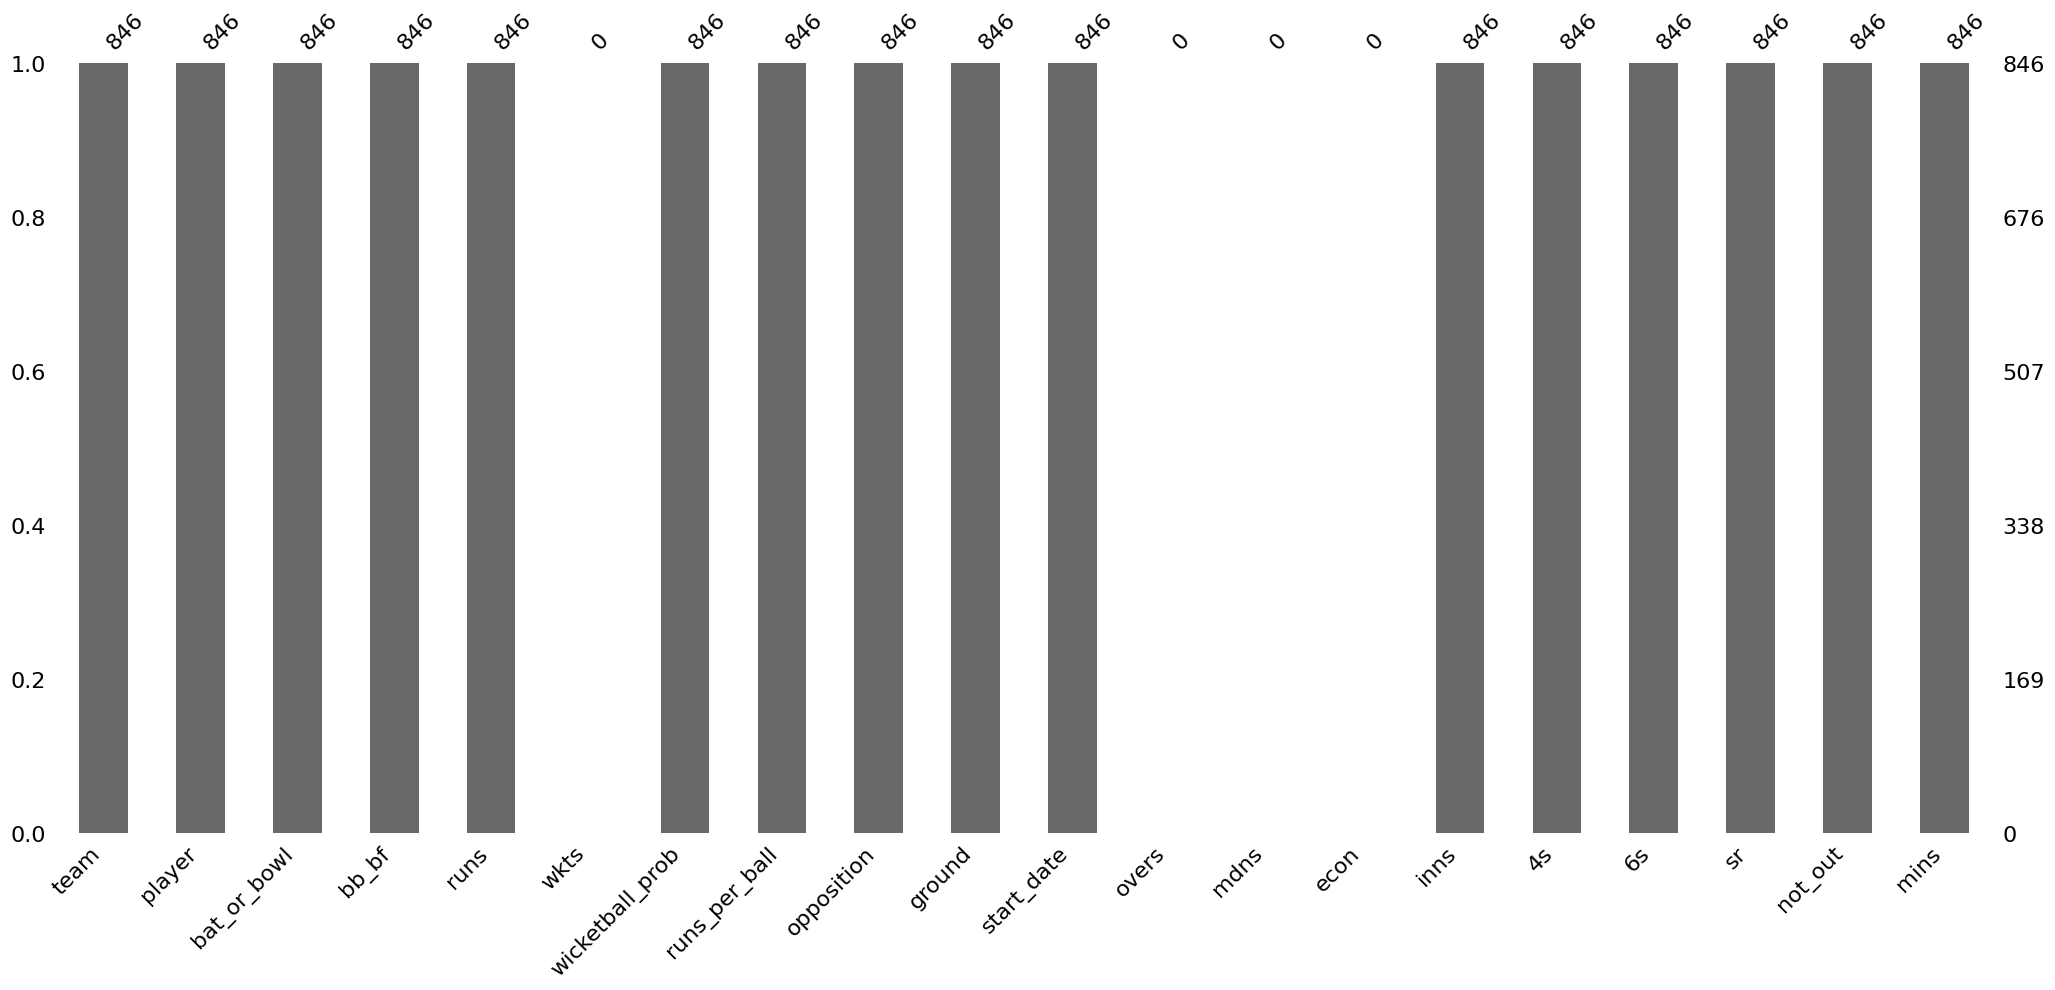

In [9]:
#visualize missing values with missingno library
msno.bar(bat_df)

In [10]:
bat_df.drop(columns=['wkts','overs','mdns','econ'],inplace=True)

In [11]:
bat_df.head()

,team,player,bat_or_bowl,bb_bf,runs,wicketball_prob,runs_per_ball,opposition,ground,start_date,inns,4s,6s,sr,not_out,mins
501,AUS,GJ Maxwell,bat,128,201,0.000000,1.5703,Afghanistan,Wankhede,7-Nov-23,2,21.0,10.0,157.03,1.0,181.0
502,SA,Q de Kock,bat,140,174,0.007143,1.2428,Bangladesh,Wankhede,24-Oct-23,1,15.0,7.0,124.28,0.0,192.0
503,AUS,DA Warner,bat,124,163,0.008065,1.3145,Pakistan,Bengaluru,20-Oct-23,1,14.0,9.0,131.45,0.0,180.0
504,NZ,DP Conway,bat,121,152,0.000000,1.2561,England,Ahmedabad,5-Oct-23,2,19.0,3.0,125.61,1.0,147.0
505,ENG,DJ Malan,bat,107,140,0.009346,1.3084,Bangladesh,Dharamsala,10-Oct-23,1,16.0,5.0,130.84,0.0,106.0


In [12]:
bat_df.rename(columns={'bat_or_bowl': 'batting'}, inplace=True)

In [13]:
bat_df.head()

,team,player,batting,bb_bf,runs,wicketball_prob,runs_per_ball,opposition,ground,start_date,inns,4s,6s,sr,not_out,mins
501,AUS,GJ Maxwell,bat,128,201,0.000000,1.5703,Afghanistan,Wankhede,7-Nov-23,2,21.0,10.0,157.03,1.0,181.0
502,SA,Q de Kock,bat,140,174,0.007143,1.2428,Bangladesh,Wankhede,24-Oct-23,1,15.0,7.0,124.28,0.0,192.0
503,AUS,DA Warner,bat,124,163,0.008065,1.3145,Pakistan,Bengaluru,20-Oct-23,1,14.0,9.0,131.45,0.0,180.0
504,NZ,DP Conway,bat,121,152,0.000000,1.2561,England,Ahmedabad,5-Oct-23,2,19.0,3.0,125.61,1.0,147.0
505,ENG,DJ Malan,bat,107,140,0.009346,1.3084,Bangladesh,Dharamsala,10-Oct-23,1,16.0,5.0,130.84,0.0,106.0


In [14]:
# Filter the DataFrame for innings where runs are greater than or equal to 100
century_innings = bat_df[bat_df['runs'] >= 100]

# Find the innings with the fewest balls taken to reach 50 runs
fastest_100 = century_innings.nsmallest(1, 'bb_bf')

# Print the details of the innings where fastest 50 runs were scored
fastest_100

,team,player,batting,bb_bf,runs,wicketball_prob,runs_per_ball,opposition,ground,start_date,inns,4s,6s,sr,not_out,mins
528,AUS,GJ Maxwell,bat,44,106,0.022727,2.409,Netherlands,Delhi,25-Oct-23,1,9.0,8.0,240.9,0.0,53.0


In [15]:
# Filter the DataFrame for innings where runs are greater than or equal to 100
century_innings = bat_df[bat_df['runs'] >= 50]

# Find the innings with the fewest balls taken to reach 50 runs
fastest_50 = century_innings.nsmallest(1, 'bb_bf')

# Print the details of the innings where fastest 50 runs were scored
fastest_50

,team,player,batting,bb_bf,runs,wicketball_prob,runs_per_ball,opposition,ground,start_date,inns,4s,6s,sr,not_out,mins
631,SL,MDKJ Perera,bat,28,51,0.035714,1.8214,New Zealand,Bengaluru,9-Nov-23,1,9.0,2.0,182.14,0.0,46.0


       player        ground  runs
0      A Dutt     Bengaluru     5
1      A Dutt         Delhi     1
2      A Dutt    Dharamsala    23
3      A Dutt  Eden Gardens     9
4      A Dutt     Hyderabad    12
..        ...           ...   ...
691  WA Young     Ahmedabad     0
692  WA Young       Chennai    54
693  WA Young    Dharamsala    49
694  WA Young     Hyderabad    70
695  WA Young          Pune    33

[696 rows x 3 columns]


In [16]:
# Group the DataFrame by ground and sum the runs for each ground
total_runs_by_ground = bat_df.groupby('ground')['runs'].sum().reset_index()

# Optionally, sort the grounds based on total runs (descending order)
total_runs_by_ground = total_runs_by_ground.sort_values(by='runs', ascending=False)

# Select the ground with the most runs
ground_with_most_runs = total_runs_by_ground.iloc[0]

print("Ground with the most runs:", ground_with_most_runs['ground'])
print("Total runs scored on this ground:", ground_with_most_runs['runs'])

Ground with the most runs: Wankhede
Total runs scored on this ground: 2749


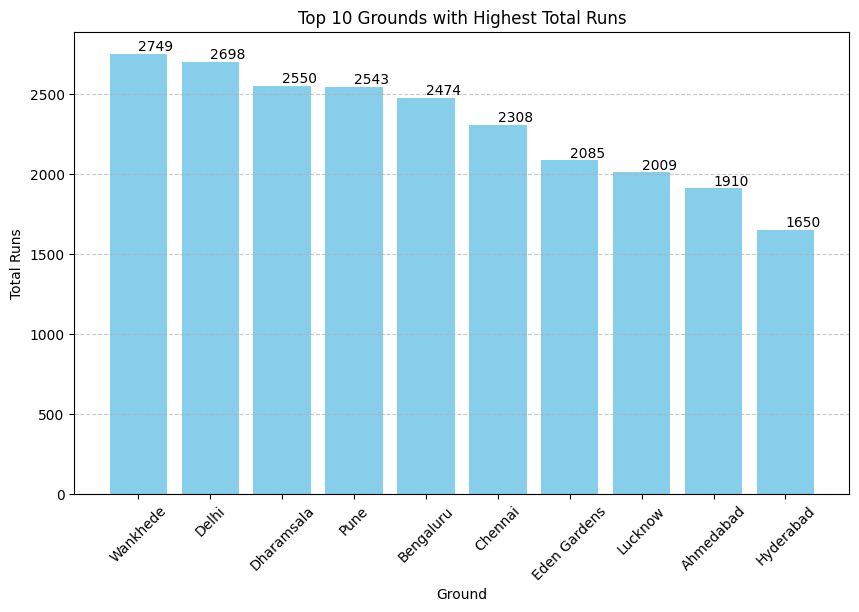

In [51]:
import matplotlib.pyplot as plt

# Select the top 10 grounds based on total runs
top_10_grounds = total_runs_by_ground.nlargest(10, 'runs')

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_grounds['ground'], top_10_grounds['runs'], color='skyblue')

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.title('Top 10 Grounds with Highest Total Runs')
plt.xlabel('Ground')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
# Group the DataFrame by ground and sum the runs for each ground
total_runs_by_ground = bat_df.groupby('ground')['runs'].sum().reset_index()

# Sort the grounds based on total runs (ascending order)
total_runs_by_ground = total_runs_by_ground.sort_values(by='runs', ascending=True)

# Select the ground with the lowest total runs
ground_with_lowest_runs = total_runs_by_ground.iloc[0]

print("Ground with the lowest runs scored:", ground_with_lowest_runs['ground'])
print("Total runs scored on this ground:", ground_with_lowest_runs['runs'])

Ground with the lowest runs scored: Hyderabad
Total runs scored on this ground: 1650


In [18]:
# Count the number of times each player has batted
batting_frequency = bat_df['player'].value_counts().reset_index()
batting_frequency.columns = ['player', 'batting_count']

# Sort the players based on batting frequency (descending order)
batting_frequency = batting_frequency.sort_values(by='batting_count', ascending=False)

# Select the player who has batted the most times
most_frequent_batter = batting_frequency.iloc[0]

print("Player who has batted the most times:", most_frequent_batter['player'])
print("Number of times this player has batted:", most_frequent_batter['batting_count'])

Player who has batted the most times: SS Iyer
Number of times this player has batted: 10


In [19]:
# Calculate the total time spent batting
total_batting_time = bat_df['mins'].sum()

print("Total time spent batting across all players:", total_batting_time, "minutes")

Total time spent batting across all players: 36142.0 minutes


In [20]:
# Group the DataFrame by player and sum the total time spent batting for each player
total_batting_time_per_player = bat_df.groupby('player')['mins'].sum().reset_index()

# Optionally, sort the players based on total batting time (descending order)
total_batting_time_per_player = total_batting_time_per_player.sort_values(by='mins', ascending=False)

# Display the total time spent batting for each player
print(total_batting_time_per_player)

                 player    mins
141             V Kohli  1097.0
106          R Ravindra   872.0
104           Q de Kock   799.0
39    HE van der Dussen   794.0
24            DA Warner   758.0
..                  ...     ...
33     Fazalhaq Farooqi     8.0
19         CBRLS Kumara     6.0
137  Tanzim Hasan Sakib     6.0
140           Usama Mir     4.0
6              AT Carey     1.0

[145 rows x 2 columns]


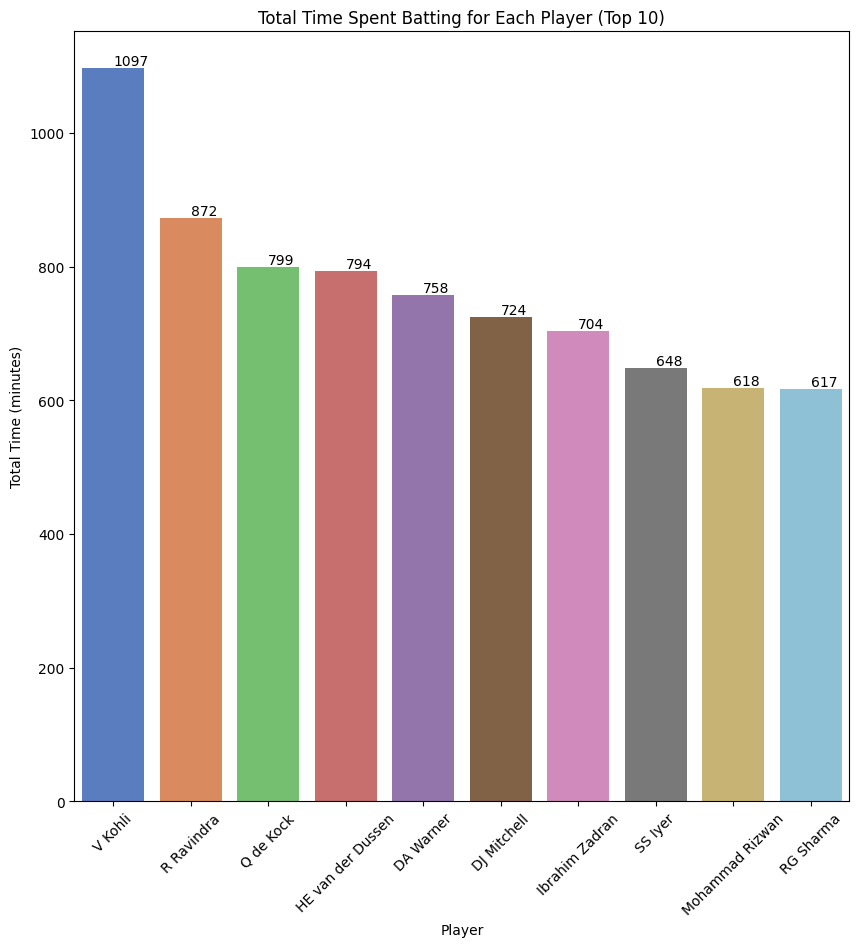

In [55]:
# Group the DataFrame by player and sum the total time spent batting for each player
total_batting_time_per_player = bat_df.groupby('player')['mins'].sum().reset_index()

# Sort the players based on total batting time (descending order)
total_batting_time_per_player = total_batting_time_per_player.sort_values(by='mins', ascending=False)

# Select the top 10 players based on total batting time
top_10_players = total_batting_time_per_player.head(10)

# Plotting
plt.figure(figsize=(10, 10))
ax = sns.barplot(data=top_10_players, x='player', y='mins', palette='muted')
plt.title('Total Time Spent Batting for Each Player (Top 10)')
plt.xlabel('Player')
plt.ylabel('Total Time (minutes)')
plt.xticks(rotation=45)

# Add data labels to the bars
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.show()


# For Checking

In [22]:
# Replace 'batsman_name' with the name of the batsman you want to find the total runs for
batsman_name = 'RG Sharma'

# Filter the DataFrame for the specified batsman
batsman_data = bat_df[bat_df['player'] == batsman_name]

# Calculate the total runs scored by the batsman
total_runs = batsman_data['runs'].sum()

# Print the total runs scored by the batsman
print(f"Total runs scored by {batsman_name}: {total_runs}")

Total runs scored by RG Sharma: 550


In [23]:
# Group the DataFrame by player and sum the runs for each player
total_runs_by_player = bat_df.groupby('player')['runs'].sum().reset_index()

# Optionally, sort the players based on their total runs (descending order)
total_runs_by_player = total_runs_by_player.sort_values(by='runs', ascending=False)

# Print the total runs scored by each individual player
print(total_runs_by_player)

               player  runs
141           V Kohli   711
104         Q de Kock   594
106        R Ravindra   578
26        DJ Mitchell   552
109         RG Sharma   550
..                ...   ...
19       CBRLS Kumara     4
74      MADI Hemantha     4
33   Fazalhaq Farooqi     2
6            AT Carey     0
140         Usama Mir     0

[145 rows x 2 columns]


In [24]:
# Group the DataFrame by player and sum the runs for each player
total_runs_by_player = bat_df.groupby('player')['runs'].sum().reset_index()

# Sort the players based on their total runs (ascending order)
total_runs_by_player = total_runs_by_player.sort_values(by='runs', ascending=True)

# Print the lowest 10 total runs scored by each individual player
print(total_runs_by_player.head(10))

                 player  runs
140           Usama Mir     0
6              AT Carey     0
33     Fazalhaq Farooqi     2
74        MADI Hemantha     4
56         JR Hazlewood     4
91       Mohammed Shami     4
19         CBRLS Kumara     4
137  Tanzim Hasan Sakib     5
103        PVD Chameera     6
127        Shariz Ahmad     6


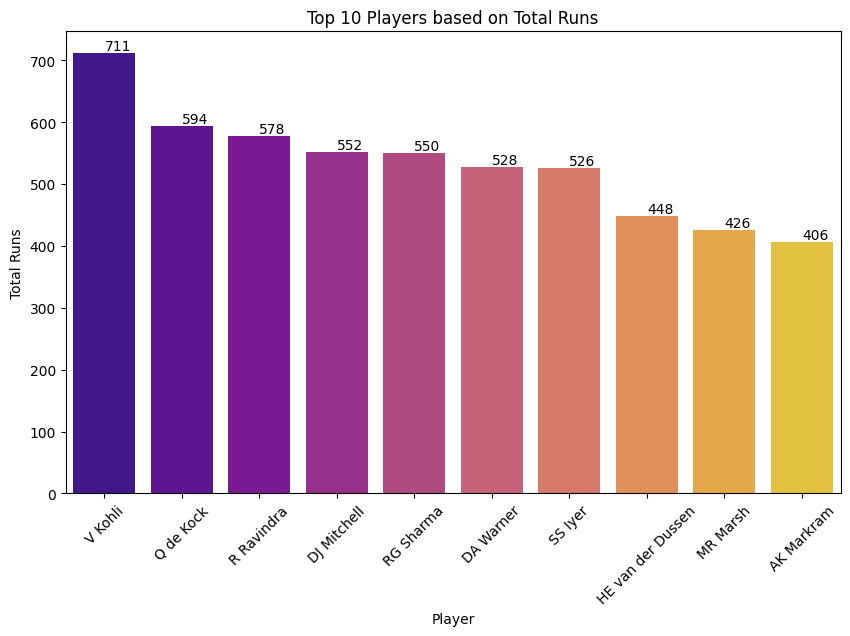

In [56]:
# Group the DataFrame by player and sum the runs for each player
total_runs_by_player = bat_df.groupby('player')['runs'].sum().reset_index()

# Optionally, sort the players based on their total runs (descending order)
total_runs_by_player = total_runs_by_player.sort_values(by='runs', ascending=False)

# Select the top 10 players based on total runs
top_10_players = total_runs_by_player.nlargest(10, 'runs')

# Plotting
plt.figure(figsize=(10, 6))  # Increase the height value
ax = sns.barplot(data=top_10_players, x='player', y='runs', palette='plasma')
plt.title('Top 10 Players based on Total Runs')
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)

# Add data labels to the bars
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.show()

In [26]:
# Group the DataFrame by player and calculate the mean strike rate for each player
sr_batsmen = bat_df.groupby('player')['sr'].mean().reset_index()

sr_batsmen

,player,sr
0,A Dutt,88.586667
1,A Zampa,75.230000
2,AAP Atkinson,91.665000
3,AD Mathews,48.927500
4,AK Markram,151.525000
...,...,...
140,Usama Mir,0.000000
141,V Kohli,82.956000
142,Vikramjit Singh,52.366667
143,W Barresi,66.167500


In [27]:
# Sort the players based on their mean strike rate (descending order) and select the top 5
top_10_sr_batsmen = sr_batsmen.nlargest(10, 'sr')

# Display the top 5 batsmen based on mean strike rate
print(top_10_sr_batsmen)

         player          sr
27    DJ Willey  163.933333
4    AK Markram  151.525000
40    HH Pandya  137.500000
110  RJW Topley  132.140000
109   RG Sharma  125.526000
23    DA Miller  123.346000
37    H Klaasen  123.195000
107   RA Jadeja  122.330000
81   MP Stoinis  121.516000
77     MJ Henry  120.833333


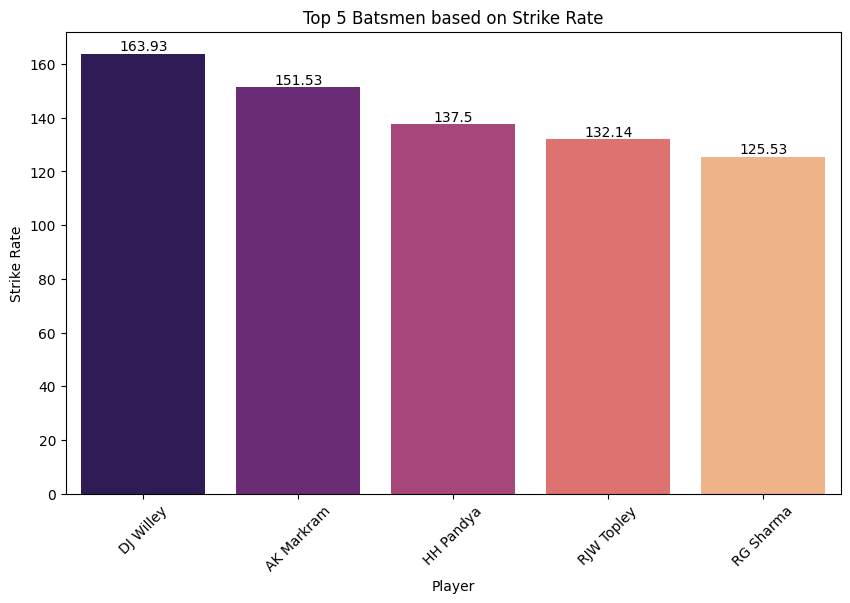

In [28]:
# Top 5 Batsmen based on Strike Rate
top_5_sr_batsmen = bat_df.groupby('player')['sr'].mean().nlargest(5).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_sr_batsmen, x='player', y='sr', palette='magma')
plt.title('Top 5 Batsmen based on Strike Rate')
plt.xlabel('Player')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45)

# Annotating each bar with its corresponding strike rate
for index, row in top_5_sr_batsmen.iterrows():
    plt.text(index, row['sr'], str(round(row['sr'], 2)), ha='center', va='bottom')

plt.show()


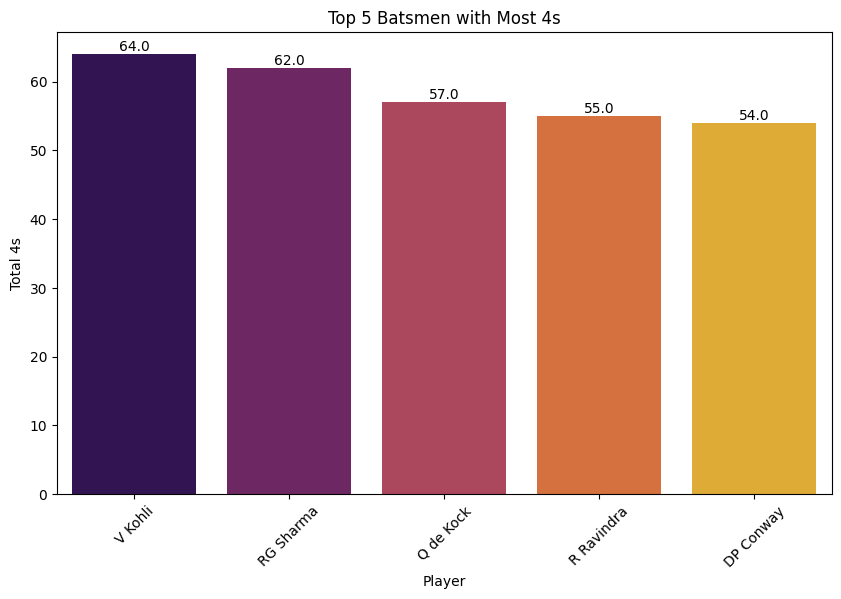

In [29]:
# Top 5 Batsmen based on 4s
top_5_4s_batsmen = bat_df.groupby('player')['4s'].sum().nlargest(5).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_4s_batsmen, x='player', y='4s', palette='inferno')
plt.title('Top 5 Batsmen with Most 4s')
plt.xlabel('Player')
plt.ylabel('Total 4s')
plt.xticks(rotation=45)

# Annotating each bar with its corresponding total 4s
for index, row in top_5_4s_batsmen.iterrows():
    plt.text(index, row['4s'], str(row['4s']), ha='center', va='bottom')

plt.show()

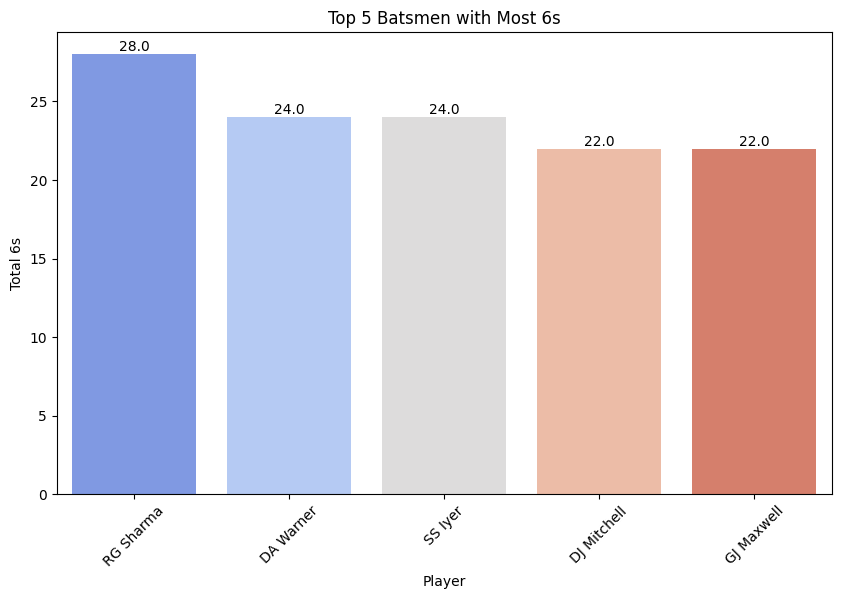

In [30]:
# Top 5 Batsmen based on 6s
top_5_6s_batsmen = df.groupby('player')['6s'].sum().nlargest(5).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_6s_batsmen, x='player', y='6s', palette='coolwarm')
plt.title('Top 5 Batsmen with Most 6s')
plt.xlabel('Player')
plt.ylabel('Total 6s')
plt.xticks(rotation=45)

# Annotating each bar with its corresponding strike rate
for index, row in top_5_6s_batsmen.iterrows():
    plt.text(index, row['6s'], str(round(row['6s'], 2)), ha='center', va='bottom')

plt.show()

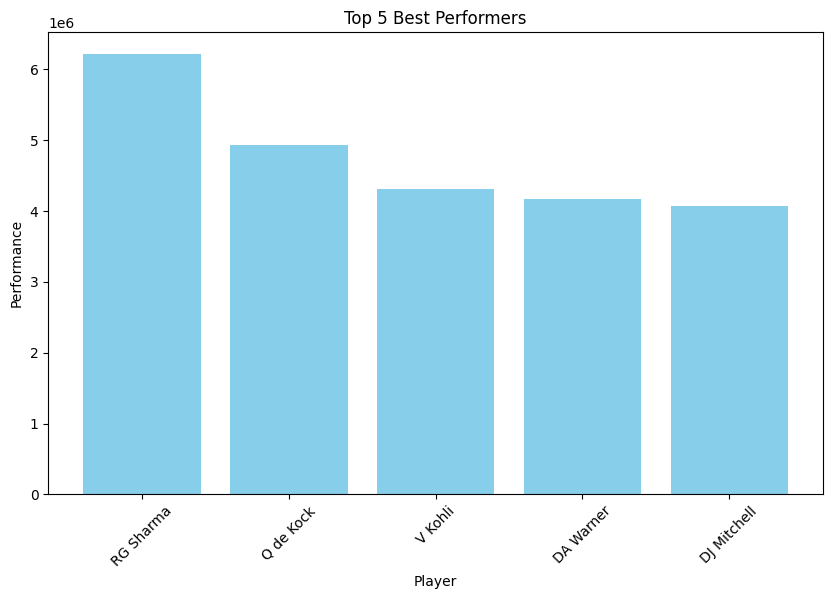

In [31]:
# Define a performance metric function
def calculate_performance(group):
    runs = group['runs'].sum()
    sr = group['sr'].mean()
    fours = group['4s'].sum()
    sixes = group['6s'].sum()
    performance = runs * sr * (fours + sixes)
    return performance

# Group the DataFrame by player and calculate performance for each player
player_performance = bat_df.groupby('player').apply(calculate_performance)

# Find top 5 best performers
top_5_performers = player_performance.nlargest(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_performers.index, top_5_performers.values, color='skyblue')
plt.title('Top 5 Best Performers')
plt.xlabel('Player')
plt.ylabel('Performance')
plt.xticks(rotation=45)
plt.show()

In [32]:
bowl_df.head()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi,bowl,60,45,3.0,0.05,0.750000,South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey,bowl,60,45,3.0,0.05,0.750000,India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry,bowl,60,48,3.0,0.05,0.800000,England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson,bowl,60,49,3.0,0.05,0.816667,Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad,bowl,60,49,3.0,0.05,0.816667,Pakistan,Chennai,23-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


<Axes: >

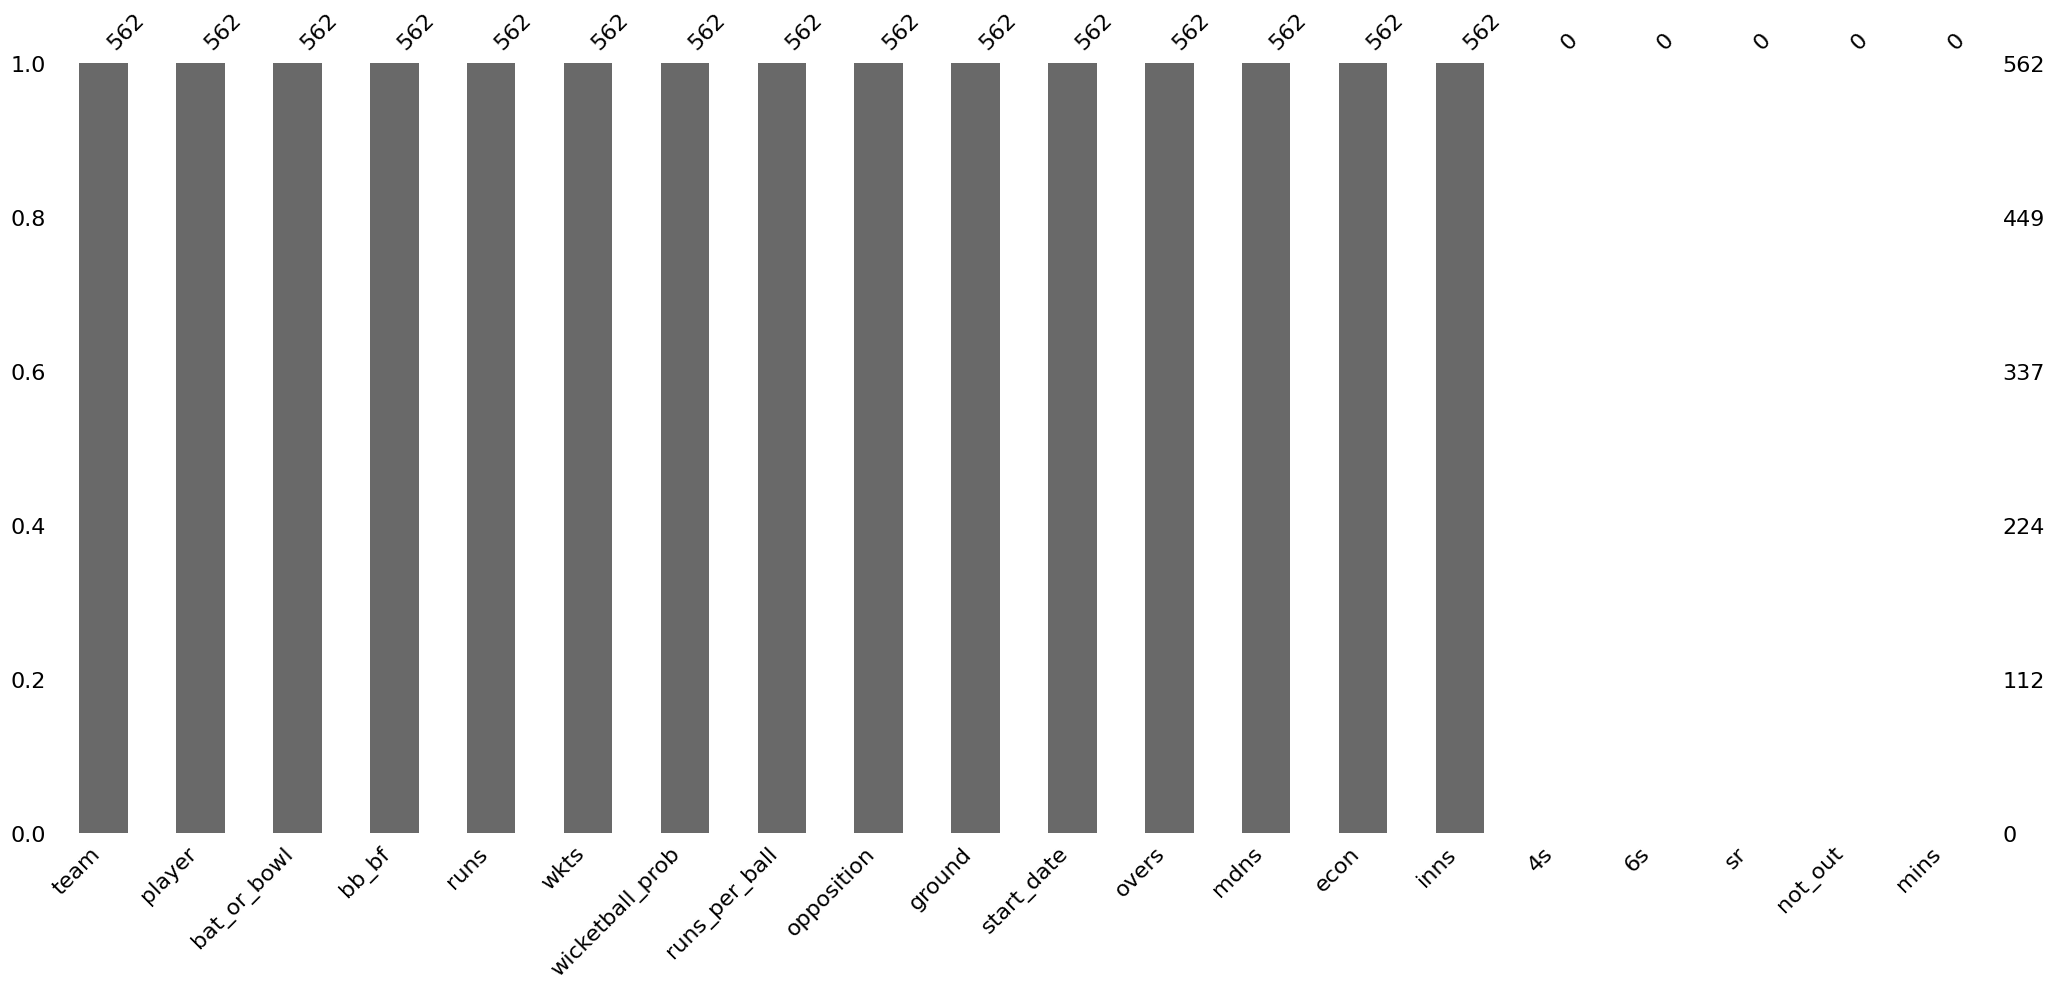

In [33]:
#visualize missing values with missingno library
msno.bar(bowl_df)

In [34]:
bowl_df.drop(columns=['4s','6s','sr','not_out','mins'],inplace=True)

In [35]:
bowl_df.rename(columns={'bat_or_bowl': 'bowl'}, inplace=True)

In [36]:
bowl_df

,team,player,bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns
0,PAK,Shaheen Shah Afridi,bowl,60,45,3.0,0.05,0.750000,South Africa,Chennai,27-Oct-23,10.0,0.0,4.50,2
1,ENG,DJ Willey,bowl,60,45,3.0,0.05,0.750000,India,Lucknow,29-Oct-23,10.0,2.0,4.50,1
2,NZ,MJ Henry,bowl,60,48,3.0,0.05,0.800000,England,Ahmedabad,5-Oct-23,10.0,1.0,4.80,1
3,NZ,LH Ferguson,bowl,60,49,3.0,0.05,0.816667,Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.90,1
4,AFG,Noor Ahmad,bowl,60,49,3.0,0.05,0.816667,Pakistan,Chennai,23-Oct-23,10.0,0.0,4.90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,NZ,MJ Santner,bowl,60,51,0.0,0.00,0.850000,India,Wankhede,15-Nov-23,10.0,1.0,5.10,1
1404,AUS,A Zampa,bowl,42,55,0.0,0.00,1.309524,South Africa,Eden Gardens,16-Nov-23,7.0,0.0,7.85,1
1405,NZ,R Ravindra,bowl,42,60,0.0,0.00,1.428571,India,Wankhede,15-Nov-23,7.0,0.0,8.57,1
1406,IND,RA Jadeja,bowl,60,63,0.0,0.00,1.050000,New Zealand,Wankhede,15-Nov-23,10.0,0.0,6.30,2


In [37]:
# Group the DataFrame by player and sum the total number of wickets taken by each player
wickets_per_player = bowl_df.groupby('player')['wkts'].sum().reset_index()

# Display the DataFrame containing the total number of wickets taken by each player
print(wickets_per_player)

                 player  wkts
0                A Dutt  10.0
1               A Zampa  22.0
2          AAP Atkinson   4.0
3            AD Mathews   6.0
4            AK Markram   1.0
..                  ...   ...
97   Tanzim Hasan Sakib   3.0
98         Taskin Ahmed   5.0
99            Usama Mir   4.0
100             V Kohli   1.0
101     Vikramjit Singh   0.0

[102 rows x 2 columns]


In [38]:
# Sort the DataFrame by total number of wickets in descending order
wickets_per_player_sorted = wickets_per_player.sort_values(by='wkts', ascending=False)

# Select the top 10 wicket-takers
top_10_wicket_takers = wickets_per_player_sorted.head(10)

# Display the top 10 wicket-takers
print(top_10_wicket_takers)

                 player  wkts
62       Mohammed Shami  23.0
1               A Zampa  22.0
16         D Madushanka  21.0
22            G Coetzee  20.0
33            JJ Bumrah  18.0
88  Shaheen Shah Afridi  18.0
44             M Jansen  17.0
52           MJ Santner  16.0
26           Haris Rauf  16.0
76            RA Jadeja  16.0


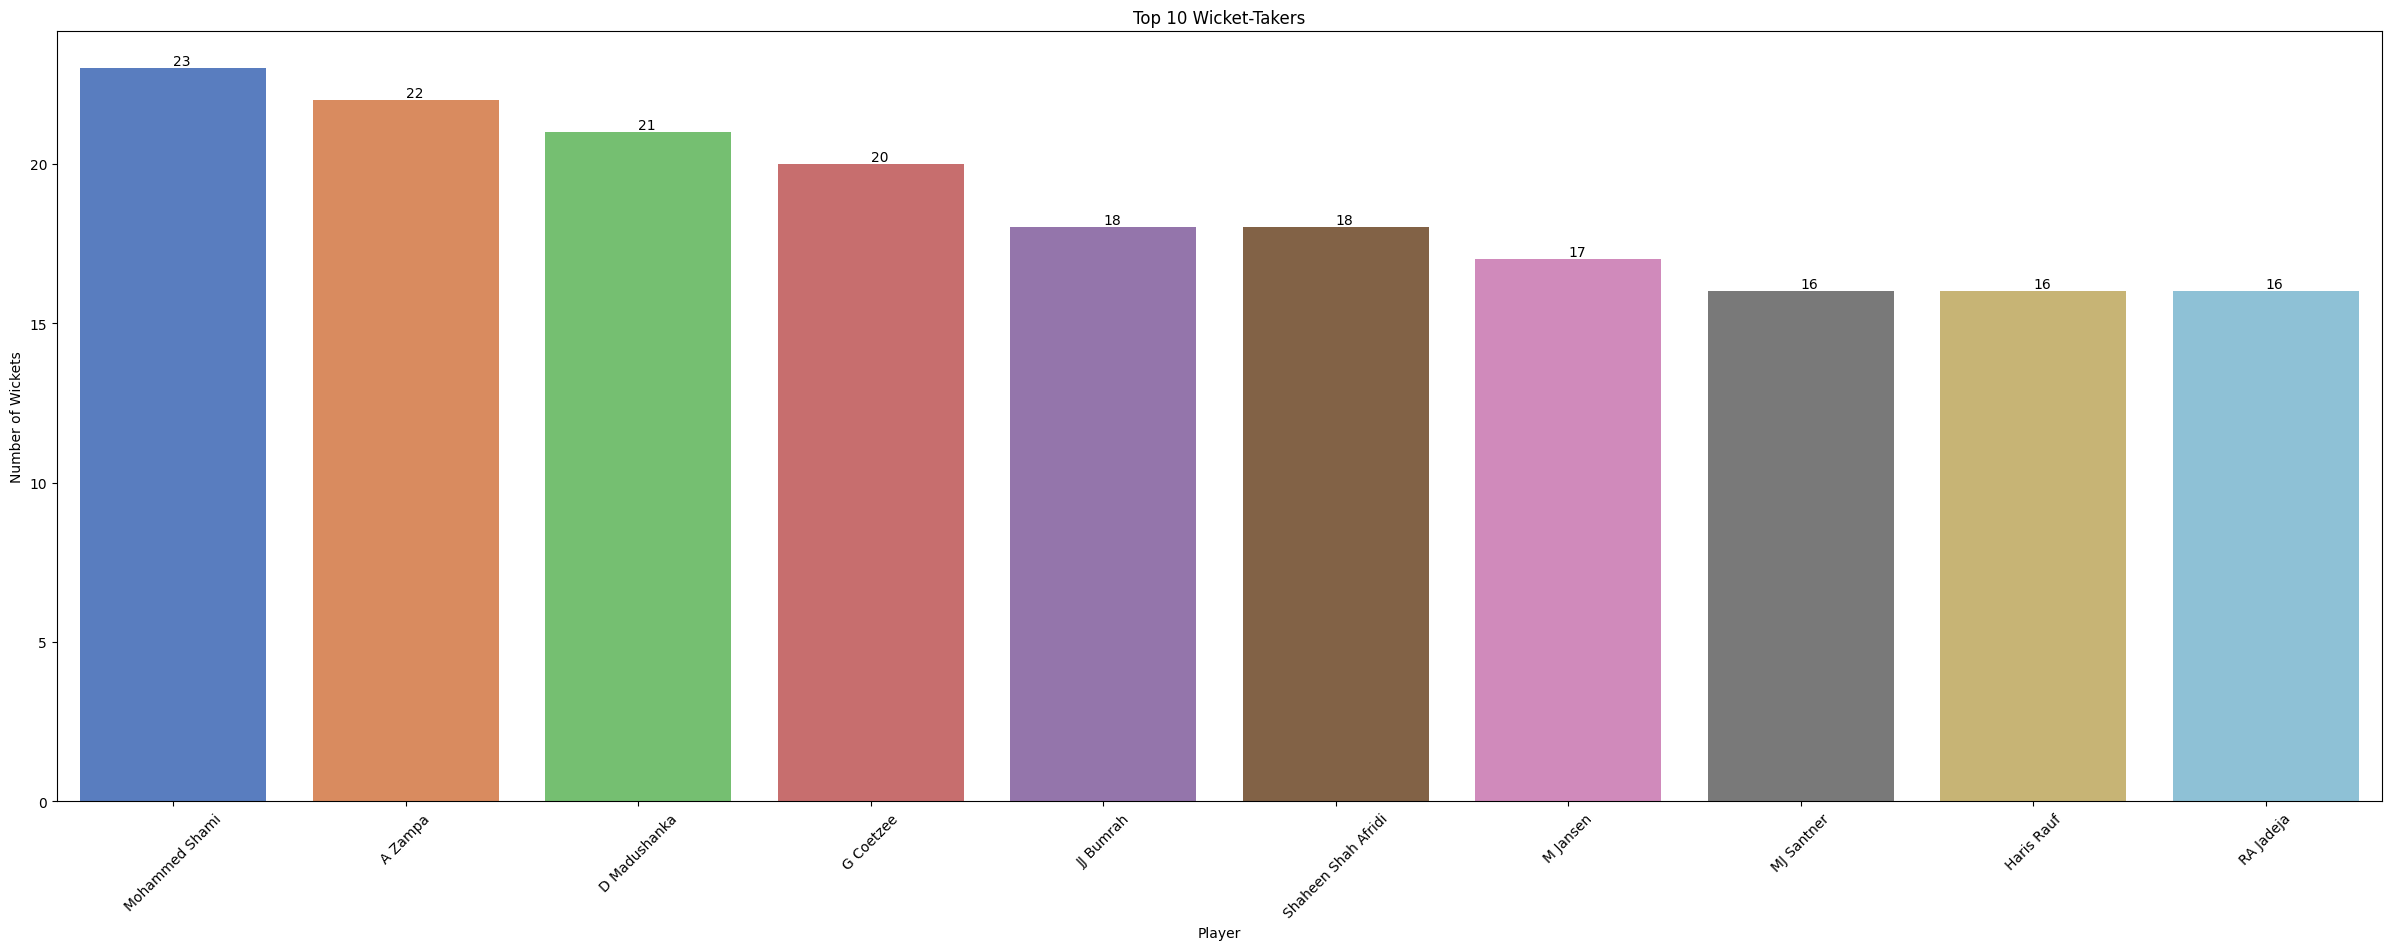

In [57]:
# Group the DataFrame by player and sum the total number of wickets taken by each player
wickets_per_player = bowl_df.groupby('player')['wkts'].sum().reset_index()

# Sort the players based on total wickets taken (descending order)
wickets_per_player = wickets_per_player.sort_values(by='wkts', ascending=False)

# Select the top 10 wicket-takers
top_10_wicket_takers = wickets_per_player.head(10)

# Plotting
plt.figure(figsize=(30, 10))
ax = sns.barplot(data=top_10_wicket_takers, x='player', y='wkts', palette='muted')
plt.title('Top 10 Wicket-Takers')
plt.xlabel('Player')
plt.ylabel('Number of Wickets')
plt.xticks(rotation=45)

# Add data labels to the bars
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.show()

In [40]:
# Group the DataFrame by player (bowler) and sum the total runs conceded by each bowler
runs_given_by_bowler = bowl_df.groupby('player')['runs'].sum().reset_index()

# Sort the bowlers based on total runs conceded (descending order)
runs_given_by_bowler_sorted = runs_given_by_bowler.sort_values(by='runs', ascending=False)

# Display the bowler who has conceded the most runs
most_runs_given_bowler = runs_given_by_bowler_sorted.iloc[0]
print("Bowler who has conceded the most runs:", most_runs_given_bowler['player'])
print("Total runs conceded by this bowler:", most_runs_given_bowler['runs'])

Bowler who has conceded the most runs: Haris Rauf
Total runs conceded by this bowler: 533


In [41]:
# Sort the DataFrame by total runs conceded in descending order
runs_given_by_bowler_sorted = runs_given_by_bowler.sort_values(by='runs', ascending=False)

# Select the top 10 bowlers who have conceded the most runs
top_10_runs_given_bowlers = runs_given_by_bowler_sorted.head(10)

# Display the top 10 bowlers who have conceded the most runs
print(top_10_runs_given_bowlers)

                 player  runs
26           Haris Rauf   533
16         D Madushanka   525
94             TA Boult   504
9          BFW de Leede   487
88  Shaheen Shah Afridi   481
71           PJ Cummins   481
43          LV van Beek   476
47             MA Starc   473
1               A Zampa   471
64     Mujeeb Ur Rahman   458


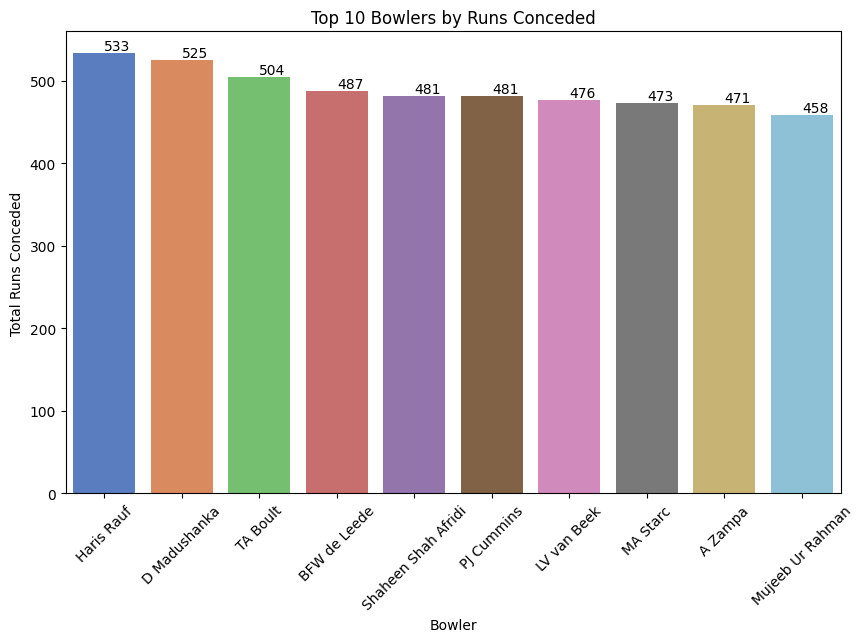

In [58]:
# Sort the DataFrame by total runs conceded in descending order
runs_given_by_bowler_sorted = runs_given_by_bowler.sort_values(by='runs', ascending=False)

# Select the top 10 bowlers who have conceded the most runs
top_10_runs_given_bowlers = runs_given_by_bowler_sorted.head(10)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_10_runs_given_bowlers, x='player', y='runs', palette='muted')
plt.title('Top 10 Bowlers by Runs Conceded')
plt.xlabel('Bowler')
plt.ylabel('Total Runs Conceded')
plt.xticks(rotation=45)

# Add data labels to the bars
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.show()


In [43]:
# Calculate economy rate for each bowler
bowl_df['economy_rate'] = bowl_df['runs'] / bowl_df['overs']

# Group the DataFrame by player (bowler) and calculate the average economy rate for each bowler
economy_per_bowler = bowl_df.groupby('player')['economy_rate'].mean().reset_index()

# Sort the bowlers based on economy rate (ascending order)
economy_per_bowler_sorted = economy_per_bowler.sort_values(by='economy_rate')

# Display the bowler with the most economical performance
most_economical_bowler = economy_per_bowler_sorted.iloc[0]
print("Bowler with the most economical performance:", most_economical_bowler['player'])
print("Average economy rate of this bowler:", most_economical_bowler['economy_rate'])


Bowler with the most economical performance: R Ashwin
Average economy rate of this bowler: 3.4


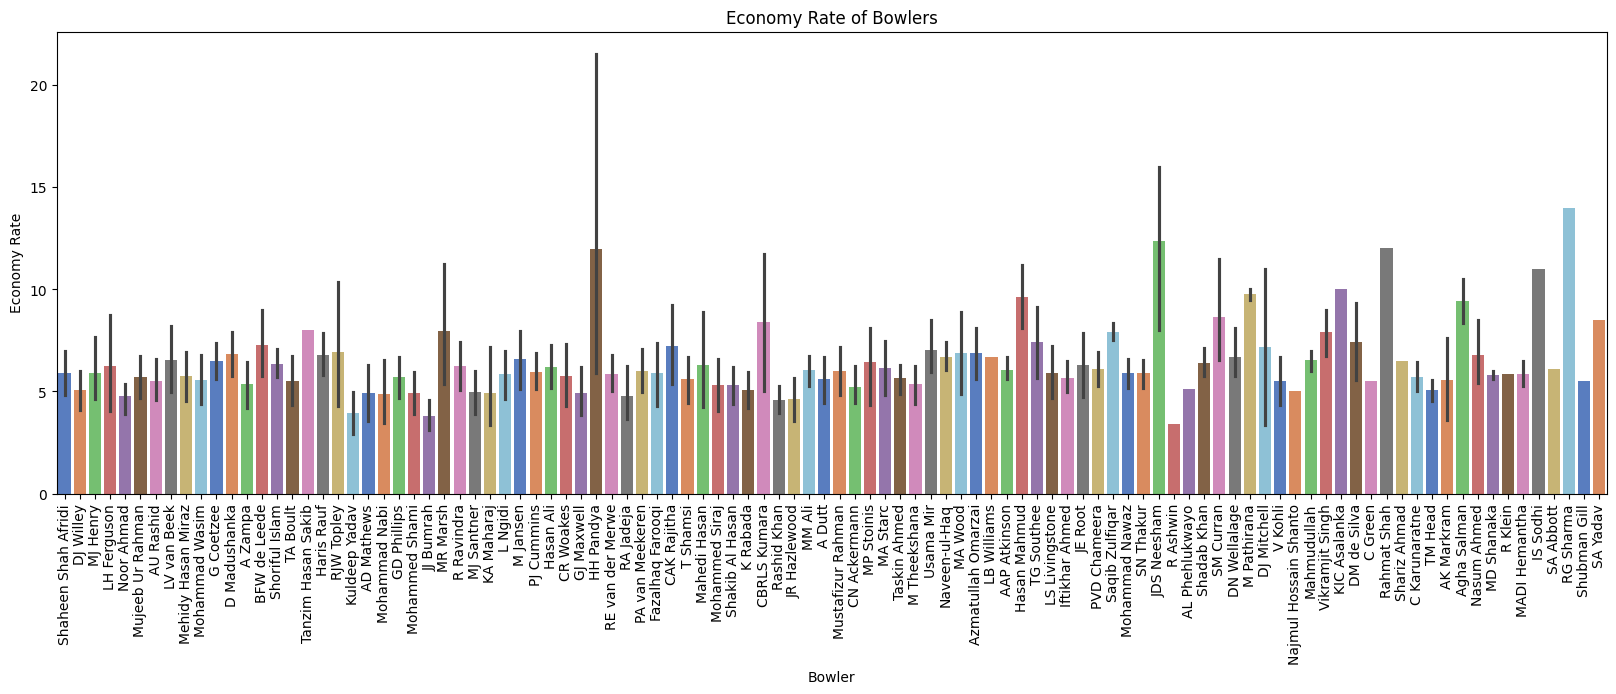

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate economy rate for each bowler
bowl_df['economy_rate'] = bowl_df['runs'] / bowl_df['overs']

# Plotting
plt.figure(figsize=(20, 6))
sns.barplot(data=bowl_df, x='player', y='economy_rate', palette='muted')
plt.title('Economy Rate of Bowlers')
plt.xlabel('Bowler')
plt.ylabel('Economy Rate')
plt.xticks(rotation=90)
plt.show()


Top 5 most economical bowlers:
           player  economy_rate
73       R Ashwin      3.400000
33      JJ Bumrah      3.810403
38  Kuldeep Yadav      3.927255
81    Rashid Khan      4.559648
34   JR Hazlewood      4.622747

Top 5 least economical bowlers:
         player  economy_rate
78    RG Sharma     14.000000
31  JDS Neesham     12.339623
80  Rahmat Shah     12.000000
25    HH Pandya     11.952381
29     IS Sodhi     11.000000


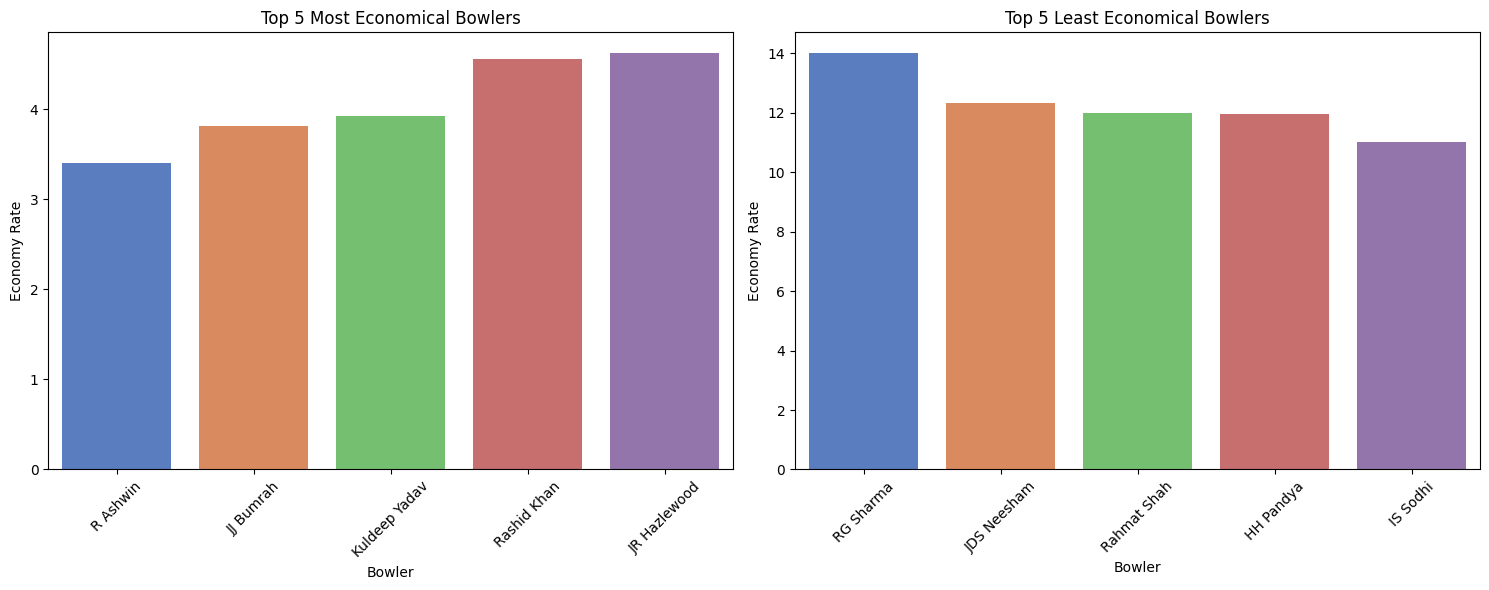

In [45]:
# Sort the bowlers based on economy rate (ascending order)
economy_per_bowler_sorted = economy_per_bowler.sort_values(by='economy_rate')

# Top 5 most economical bowlers
top_5_most_economical = economy_per_bowler_sorted.head(5)

# Sort the bowlers based on economy rate (descending order)
economy_per_bowler_sorted_desc = economy_per_bowler.sort_values(by='economy_rate', ascending=False)

# Top 5 least economical bowlers
top_5_least_economical = economy_per_bowler_sorted_desc.head(5)

print("Top 5 most economical bowlers:")
print(top_5_most_economical)
print("\nTop 5 least economical bowlers:")
print(top_5_least_economical)

# Plotting
plt.figure(figsize=(15, 6))

# Subplot for top 5 most economical bowlers
plt.subplot(1, 2, 1)
sns.barplot(data=top_5_most_economical, x='player', y='economy_rate', palette='muted')
plt.title('Top 5 Most Economical Bowlers')
plt.xlabel('Bowler')
plt.ylabel('Economy Rate')
plt.xticks(rotation=45)

# Subplot for top 5 least economical bowlers
plt.subplot(1, 2, 2)
sns.barplot(data=top_5_least_economical, x='player', y='economy_rate', palette='muted')
plt.title('Top 5 Least Economical Bowlers')
plt.xlabel('Bowler')
plt.ylabel('Economy Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [46]:
# Group the DataFrame by player (bowler) and sum the total number of maidens bowled by each bowler
maidens_per_bowler = bowl_df.groupby('player')['mdns'].sum().reset_index()

# Sort the bowlers based on total maidens bowled (descending order)
maidens_per_bowler_sorted = maidens_per_bowler.sort_values(by='mdns', ascending=False)

# Display the bowler who has bowled the most maidens
most_maidens_bowler = maidens_per_bowler_sorted.iloc[0]
print("Bowler who has bowled the most maidens:", most_maidens_bowler['player'])
print("Total maidens bowled by this bowler:", most_maidens_bowler['mdns'])

Bowler who has bowled the most maidens: JR Hazlewood
Total maidens bowled by this bowler: 8.0


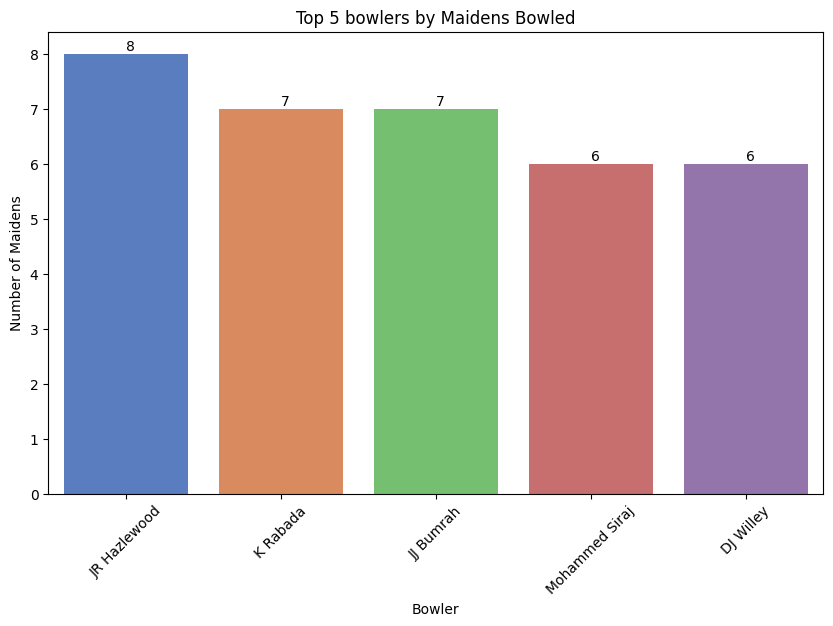

In [59]:
# Sort the DataFrame by total maidens bowled in descending order
maidens_per_bowler_sorted = maidens_per_bowler.sort_values(by='mdns', ascending=False)

# Select the top 5 bowlers who have bowled the most maidens
top_5_maidens_bowlers = maidens_per_bowler_sorted.head(5)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_5_maidens_bowlers, x='player', y='mdns', palette='muted')
plt.title('Top 5 bowlers by Maidens Bowled')
plt.xlabel('Bowler')
plt.ylabel('Number of Maidens')
plt.xticks(rotation=45)

# Add data labels to the bars
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.show()

            player  wkts  mdns  economy_rate  composite_score
33       JJ Bumrah  18.0   7.0      3.810403         0.799370
62  Mohammed Shami  23.0   3.0      4.912698         0.742319
34    JR Hazlewood  14.0   8.0      4.622747         0.738309
16    D Madushanka  21.0   4.0      6.838322         0.708831
35        K Rabada  13.0   7.0      5.094136         0.672335


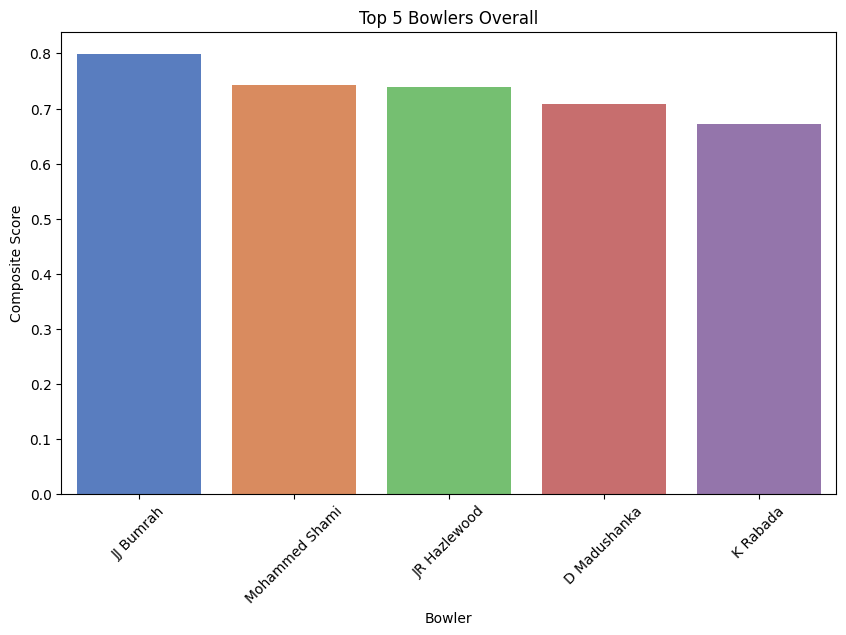

In [48]:
# Calculate economy rate for each bowler
bowl_df['economy_rate'] = bowl_df['runs'] / bowl_df['overs']

# Group the DataFrame by player (bowler) and sum the total number of wickets, maidens, and calculate the average economy rate for each bowler
bowler_stats = bowl_df.groupby('player').agg({'wkts': 'sum', 'mdns': 'sum', 'economy_rate': 'mean'}).reset_index()

# Normalize the statistics to ensure each metric has equal importance
# You can adjust the weights according to your preference
weight_wickets = 0.5
weight_maidens = 0.3
weight_economy = 0.2

# Calculate the composite score for each bowler
bowler_stats['composite_score'] = (weight_wickets * bowler_stats['wkts'] / bowler_stats['wkts'].max()) + \
                                  (weight_maidens * bowler_stats['mdns'] / bowler_stats['mdns'].max()) + \
                                  (weight_economy * (1 - (bowler_stats['economy_rate'] / bowler_stats['economy_rate'].max())))

# Sort the bowlers based on the composite score (descending order)
top_5_bowlers = bowler_stats.sort_values(by='composite_score', ascending=False).head(5)

# Display the top 5 bowlers
print(top_5_bowlers)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_bowlers, x='player', y='composite_score', palette='muted')
plt.title('Top 5 Bowlers Overall')
plt.xlabel('Bowler')
plt.ylabel('Composite Score')
plt.xticks(rotation=45)
plt.show()

# Conclusion 
The analysis of the dataset reveals insights into the performances of bowlers, batsmen, and overall team dynamics, providing valuable information for strategic decision-making in cricket.